<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://github.com/MVOSlab-sdstate/AST426_Lab/blob/main/Lab%2006/AST426L%20Lab%206%20Fall%202024.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td>
    <td><a target="_parent"  href="https://nbviewer.org/github/MVOSlab-sdstate/AST426_Lab/blob/main/Lab%2006/AST426L%20Lab%206%20Fall%202024.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
    <td><a target="_parent"  href="https://colab.research.google.com/github/MVOSlab-sdstate/AST426_Lab/blob/main/Lab%2006/AST426L%20Lab%206%20Fall%202024.ipynb"><img width=26px src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
    </table>

<p style = "font-size: X-large; font-family:'Georgia';"> Load all the necessary libraries </p>

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


<p style = "font-size: X-large; font-family:'Georgia';"> Mount Google Drive </p>

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p style = "font-size: X-large; font-family:'Georgia';"> Load the dataset from your Google Drive </p>

In [ ]:
# Define the dataset path in Google Drive
dataset_path = '/content/drive/MyDrive/AST426L_Lab6_Fall2024/corn_healthy_disease_dataset/data/'  # Update this to your dataset path

# Initialize lists to store images and labels
corn_images = []
corn_labels = []

# Define the classes
classes = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

# Load images from each class folder
for class_index, class_name in enumerate(classes):
    class_folder = os.path.join(dataset_path, class_name)
    for root, dirs, files in os.walk(class_folder):
        for file in files:
            if file.endswith(".jpg"):
                image = cv2.imread(os.path.join(root, file))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                corn_images.append(image)
                corn_labels.append(class_index)

print("Loaded", len(corn_images), "images from the dataset.")



Loaded 1658 images from the dataset.


<p style = "font-size: X-large; font-family:'Georgia';"> Analyze Histograms for RGB Channels </p>

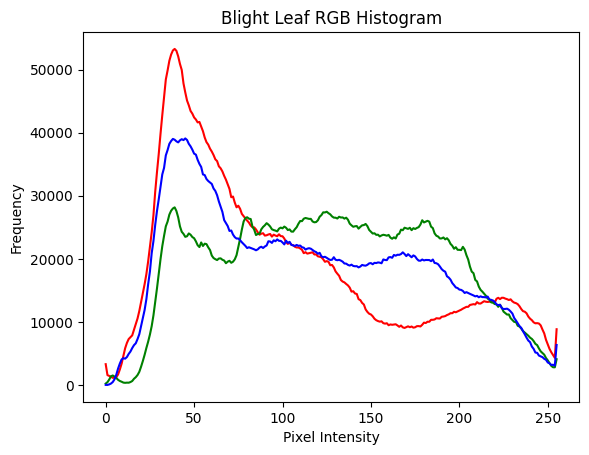

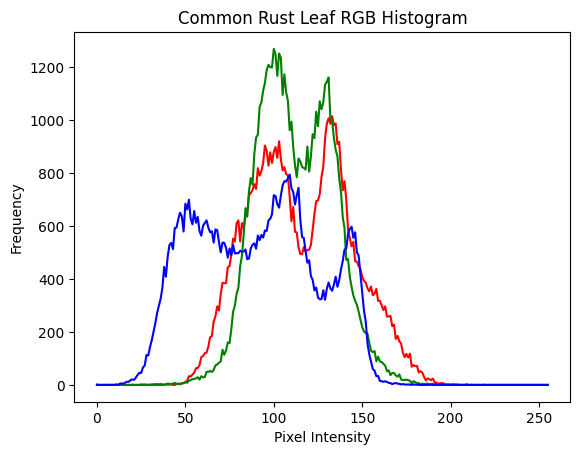

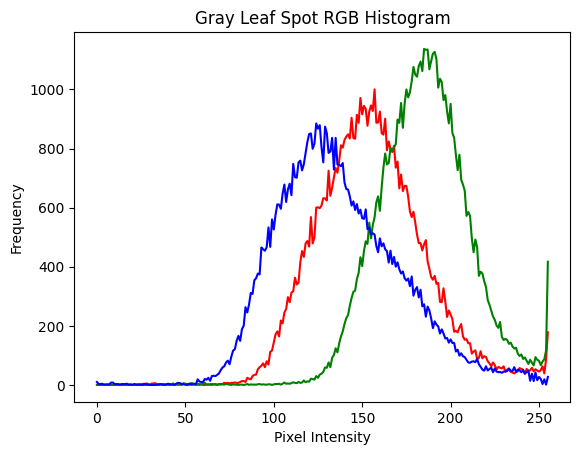

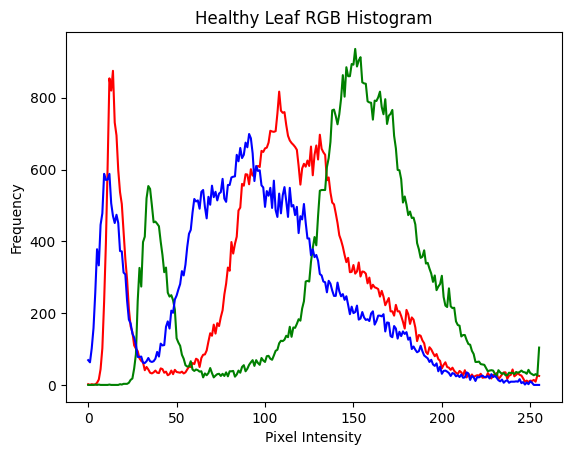

In [ ]:
# Function to plot RGB histograms
def plot_histogram(image, title):
    colors = ('r', 'g', 'b')
    plt.figure()
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.show()

# Plot histograms for a few images from each class
plot_histogram(corn_images[0], 'Blight Leaf RGB Histogram')
plot_histogram(corn_images[len(corn_images)//4], 'Common Rust Leaf RGB Histogram')
plot_histogram(corn_images[len(corn_images)//2], 'Gray Leaf Spot RGB Histogram')
plot_histogram(corn_images[-1], 'Healthy Leaf RGB Histogram')



<p style = "font-size: X-large; font-family:'Georgia';"> Generate 3D RGB Plots for Visualization. This will take some time. Have patience. </p>

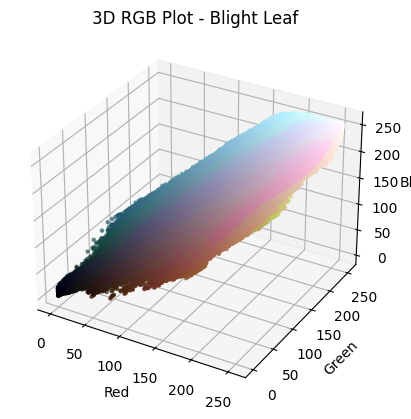

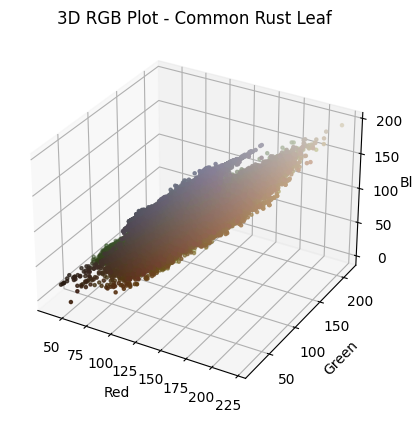

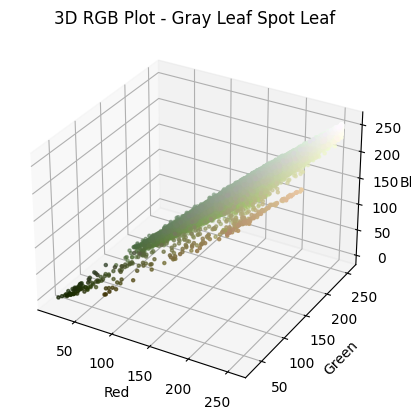

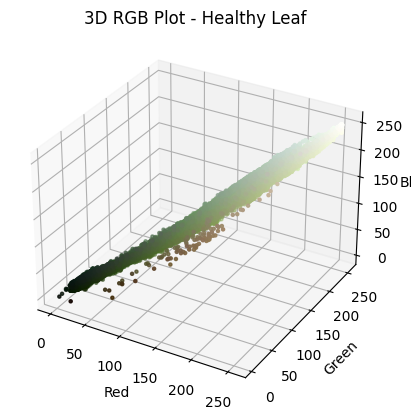

In [ ]:
# Function to generate 3D RGB plot
def plot_3d_rgb(image, title):
    r, g, b = cv2.split(image)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(r.flatten(), g.flatten(), b.flatten(), c=np.array([r.flatten(), g.flatten(), b.flatten()]).T / 255.0, marker='.')

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    plt.title(title)
    plt.show()

# 3D RGB scatter plot for an image from each class
plot_3d_rgb(corn_images[0], '3D RGB Plot - Blight Leaf')
plot_3d_rgb(corn_images[len(corn_images)//4], '3D RGB Plot - Common Rust Leaf')
plot_3d_rgb(corn_images[len(corn_images)//2], '3D RGB Plot - Gray Leaf Spot Leaf')
plot_3d_rgb(corn_images[-1], '3D RGB Plot - Healthy Leaf')



<p style = "font-size: X-large; font-family:'Georgia';"> Prepare Data for Training your Machine Learning Models for classification task. </p>

---



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load and preprocess images
datagen = ImageDataGenerator(rescale=1./255)
image_size = (128, 128)  # Resize images to 128x128 pixels
batch_size = 32

# Path to the image directories
data_dir = '/content/drive/MyDrive/AST426L_Lab6_Fall2024/corn_healthy_disease_dataset/data'

# Load images
image_gen = datagen.flow_from_directory(
    data_dir, target_size=image_size, batch_size=batch_size, class_mode='sparse', shuffle=True
)

X, y = [], []
for _ in range(len(image_gen)):
    images, labels = next(image_gen)
    X.extend(images)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

# Verify the shapes of the loaded data
print(f"Image data shape: {X.shape}")
print(f"Label data shape: {y.shape}")


Found 4188 images belonging to 4 classes.
Image data shape: (4188, 128, 128, 3)
Label data shape: (4188,)


<p style = "font-size: X-large; font-family:'Georgia';"> Flatten Images. Do not worry about this for now </p

In [ ]:
# Step 2: Flatten images
X_flat = X.reshape(X.shape[0], -1)  # Flatten each image into a 1D array

# Verify the flattened data shape
print(f"Flattened data shape: {X_flat.shape}")


Flattened data shape: (4188, 49152)


<p style = "font-size: X-large; font-family:'Georgia';"> Apply PCA for Dimensionality Reduction. DO NOT WORRY ABOUT THIS. </p>

In [ ]:
from sklearn.decomposition import PCA

# Step 3: Apply PCA for dimensionality reduction
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_flat)

# Save the PCA model for later use
import joblib
joblib.dump(pca, 'pca_model.joblib')

# Verify the reduced data shape
print(f"PCA reduced data shape: {X_pca.shape}")


PCA reduced data shape: (4188, 100)


<p style = "font-size: X-large; font-family:'Georgia';"> Encode Labels. This gives labels like 0, 1, 2, and 3to image corresponding to each class i.e., Blight, Common_Rust, Gray_Leaf_Spot and Healthy. </p>

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 4: Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify the encoded labels
print(f"Encoded labels: {y_encoded}")


Encoded labels: [1 0 1 ... 0 1 0]


<p style = "font-size: X-large; font-family:'Georgia';"> Split the data into training and testing., We use 70% for training and 30% for testing. </p>

In [ ]:
from sklearn.model_selection import train_test_split

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

# Verify the shapes of the training and testing data
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training data shape: (2931, 100), Training labels shape: (2931,)
Testing data shape: (1257, 100), Testing labels shape: (1257,)


<p style = "font-size: X-large; font-family:'Georgia';"> Train Random Forest Classifier </p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 6: Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Save the trained Random Forest model
joblib.dump(rf_clf, 'random_forest_corn_leaf_model.joblib')


['random_forest_corn_leaf_model.joblib']

<p style = "font-size: X-large; font-family:'Georgia';"> Train SVM Classifier. This will take some time. Have patience.
 </p>



In [ ]:
from sklearn.svm import SVC

# Step 7: Train SVM Classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)  # Ensure SVM supports predict_proba
svm_clf.fit(X_train, y_train)

# Save the trained SVM model
joblib.dump(svm_clf, 'svm_corn_leaf_model.joblib')



['svm_corn_leaf_model.joblib']

<p style = "font-size: X-large; font-family:'Georgia';"> Evaluate the trained RF and SVM Models. Note the accuracy values for both the models from the classiifcation report. </p>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 8: Evaluate Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Step 8: Evaluate SVM Classifier
y_pred_svm = svm_clf.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.87      0.77       334
           1       0.89      0.95      0.92       390
           2       0.83      0.12      0.21       169
           3       0.89      0.98      0.93       364

    accuracy                           0.82      1257
   macro avg       0.83      0.73      0.71      1257
weighted avg       0.83      0.82      0.79      1257

Random Forest Confusion Matrix:
 [[290  20   4  20]
 [  8 370   0  12]
 [121  17  20  11]
 [  2   7   0 355]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.82      0.71       334
           1       0.92      0.91      0.92       390
           2       0.51      0.27      0.35       169
           3       0.94      0.89      0.92       364

    accuracy                           0.79      1257
   macro avg       0.75      0.72      0.72      1257
weighted 

<p style = "font-size: X-large; font-family:'Georgia';"> Visualize Confusion Matrices. Note the correct number of predictions along the diagonal for each class. </p>

---



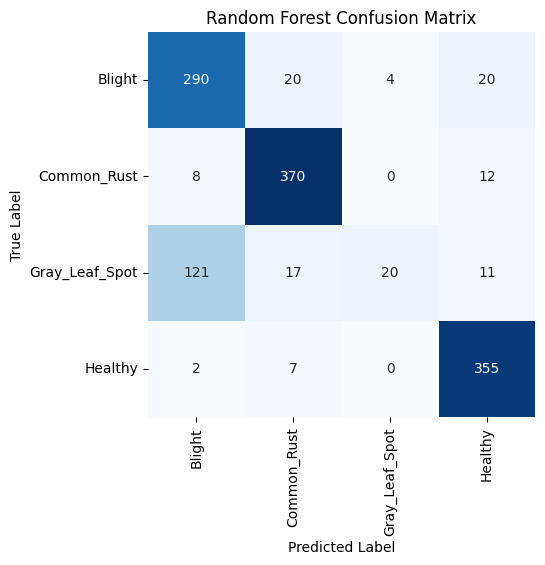

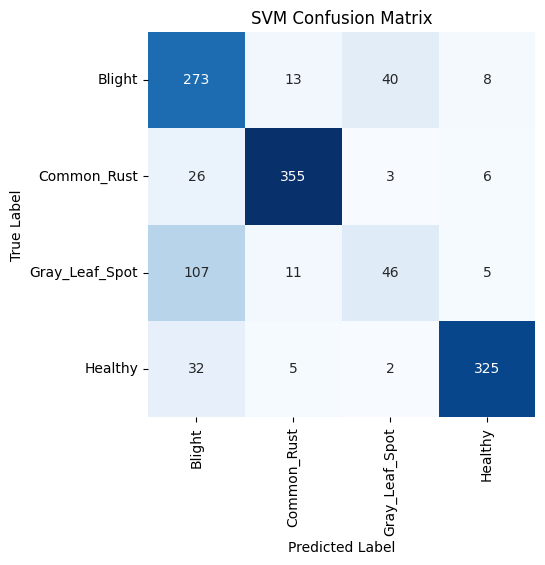

In [ ]:
import seaborn as sns
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices for Random Forest and SVM
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Random Forest Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), "SVM Confusion Matrix")



<p style = "font-size: X-large; font-family:'Georgia';"> Use the trained models to make predictions on new image datasets. </p>



In [ ]:
# Import required libraries
import ipywidgets as widgets
from IPython.display import display, clear_output
import cv2
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables for storing the model, PCA, and image
loaded_model = None
loaded_pca = None
loaded_image = None

# Define the classes for corn leaves
classes = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

# Create text inputs for model, PCA, and image paths
model_path_input = widgets.Text(
    value='',
    placeholder='Enter path to the model (.joblib) file',
    description='Model Path:',
    disabled=False
)

pca_path_input = widgets.Text(
    value='',
    placeholder='Enter path to the PCA model (.joblib) file',
    description='PCA Path:',
    disabled=False
)

image_path_input = widgets.Text(
    value='',
    placeholder='Enter path to the image (.jpg/.png) file',
    description='Image Path:',
    disabled=False
)

# Create buttons
load_model_button = widgets.Button(description="Load Model")
load_pca_button = widgets.Button(description="Load PCA")
load_image_button = widgets.Button(description="Load Image")
predict_button = widgets.Button(description="Make Prediction")
output = widgets.Output()

# Function to load model from path
def load_model(b):
    global loaded_model
    model_path = model_path_input.value  # Get the path from input
    try:
        loaded_model = joblib.load(model_path)
        with output:
            clear_output()
            print(f"Model loaded successfully from: {model_path}")
    except FileNotFoundError:
        with output:
            clear_output()
            print(f"Error: Model file not found at {model_path}")

# Function to load PCA from path
def load_pca(b):
    global loaded_pca
    pca_path = pca_path_input.value  # Get the path from input
    try:
        loaded_pca = joblib.load(pca_path)
        with output:
            clear_output()
            print(f"PCA loaded successfully from: {pca_path}")
    except FileNotFoundError:
        with output:
            clear_output()
            print(f"Error: PCA file not found at {pca_path}")

# Function to load image from path
def load_image(b):
    global loaded_image
    image_path = image_path_input.value  # Get the path from input
    try:
        loaded_image = cv2.imread(image_path)
        loaded_image = cv2.cvtColor(loaded_image, cv2.COLOR_BGR2RGB)
        loaded_image = cv2.resize(loaded_image, (128, 128))  # Resize to match training size
        with output:
            clear_output()
            plt.imshow(loaded_image)
            plt.title("Loaded Image")
            plt.axis('off')
            plt.show()
    except FileNotFoundError:
        with output:
            clear_output()
            print(f"Error: Image file not found at {image_path}")

# Function to flatten the image for prediction (same as in training)
def flatten_image(image):
    # Flatten the image to match the training process
    return image.flatten().reshape(1, -1)

# Function to make prediction
def make_prediction(b):
    if loaded_model is None or loaded_image is None or loaded_pca is None:
        with output:
            clear_output()
            print("Please load the model, PCA, and an image first!")
    else:
        # Flatten the loaded image to match the training process
        features = flatten_image(loaded_image)

        # Apply PCA to match training dimensionality
        features_pca = loaded_pca.transform(features)

        try:
            # Try to get confidence using predict_proba (for models like Random Forest)
            confidence = np.max(loaded_model.predict_proba(features_pca)) * 100
            prediction = loaded_model.predict(features_pca)
            predicted_class = classes[int(prediction.item())]

            with output:
                clear_output()
                plt.imshow(loaded_image)
                plt.title(f"Prediction: {predicted_class} ({confidence:.2f}% confident)")
                plt.axis('off')
                plt.show()
        except AttributeError:
            # If the model doesn't support predict_proba (e.g., SVM)
            prediction = loaded_model.predict(features_pca)
            predicted_class = classes[int(prediction.item())]

            with output:
                clear_output()
                plt.imshow(loaded_image)
                plt.title(f"Prediction: {predicted_class} (No confidence score)")
                plt.axis('off')
                plt.show()

# Assign actions to buttons
load_model_button.on_click(load_model)
load_pca_button.on_click(load_pca)
load_image_button.on_click(load_image)
predict_button.on_click(make_prediction)

# Display widgets
display(model_path_input, load_model_button, pca_path_input, load_pca_button, image_path_input, load_image_button, predict_button, output)



Text(value='', description='Model Path:', placeholder='Enter path to the model (.joblib) file')

Button(description='Load Model', style=ButtonStyle())

Text(value='', description='PCA Path:', placeholder='Enter path to the PCA model (.joblib) file')

Button(description='Load PCA', style=ButtonStyle())

Text(value='', description='Image Path:', placeholder='Enter path to the image (.jpg/.png) file')

Button(description='Load Image', style=ButtonStyle())

Button(description='Make Prediction', style=ButtonStyle())

Output()